In [ ]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Set file path and create dataframe
meta_info = pd.DataFrame(pd.read_csv('../Resources/metacritic_game_info.csv'))

# Set index to game title
meta_info = meta_info.dropna().set_index('Title')

# Display first five rows
meta_info.head()

In [ ]:
# Set 'Metascore' and 'Avg_Userscore' to float64 from object type
meta_info["Metascore"] = pd.to_numeric(meta_info["Metascore"],errors='coerce')
meta_info["Avg_Userscore"] = pd.to_numeric(meta_info["Avg_Userscore"],errors='coerce')

# Check
meta_info.dtypes

In [37]:
# Create series from 'Metascore'
meta = meta_info['Metascore']

# Create new dataframe from meta series and add
scores = pd.DataFrame(meta)

# Add column 'Userscore' 
# 'Avg_Userscore' multipled by 10 to create a Userscore comparable to Metascore
scores['Userscore'] = meta_info['Avg_Userscore']*10

# Add column 'Score Difference' 
# The absolute value of the difference between 'Metascore' and 'Userscore'
scores['Score Difference'] = abs(scores['Metascore'] - scores['Userscore'])

# Sort of the 'Score Difference' (descending) and disply first and last rows
scores = scores.sort_values('Userscore',ascending=False).head(20)
scores

,Metascore,Userscore,Score Difference
Title,,,
The Witcher 3: Wild Hunt,93.0,93.0,0.0
Bloodborne: The Old Hunters,87.0,93.0,6.0
Resident Evil,91.0,93.0,2.0
Resident Evil 4,96.0,93.0,3.0
Metal Gear Solid,94.0,92.0,2.0
The Evil Within 2,82.0,92.0,10.0
Baldur's Gate II: Shadows of Amn,95.0,92.0,3.0
Super Mario 64,94.0,92.0,2.0
Portal,90.0,92.0,2.0


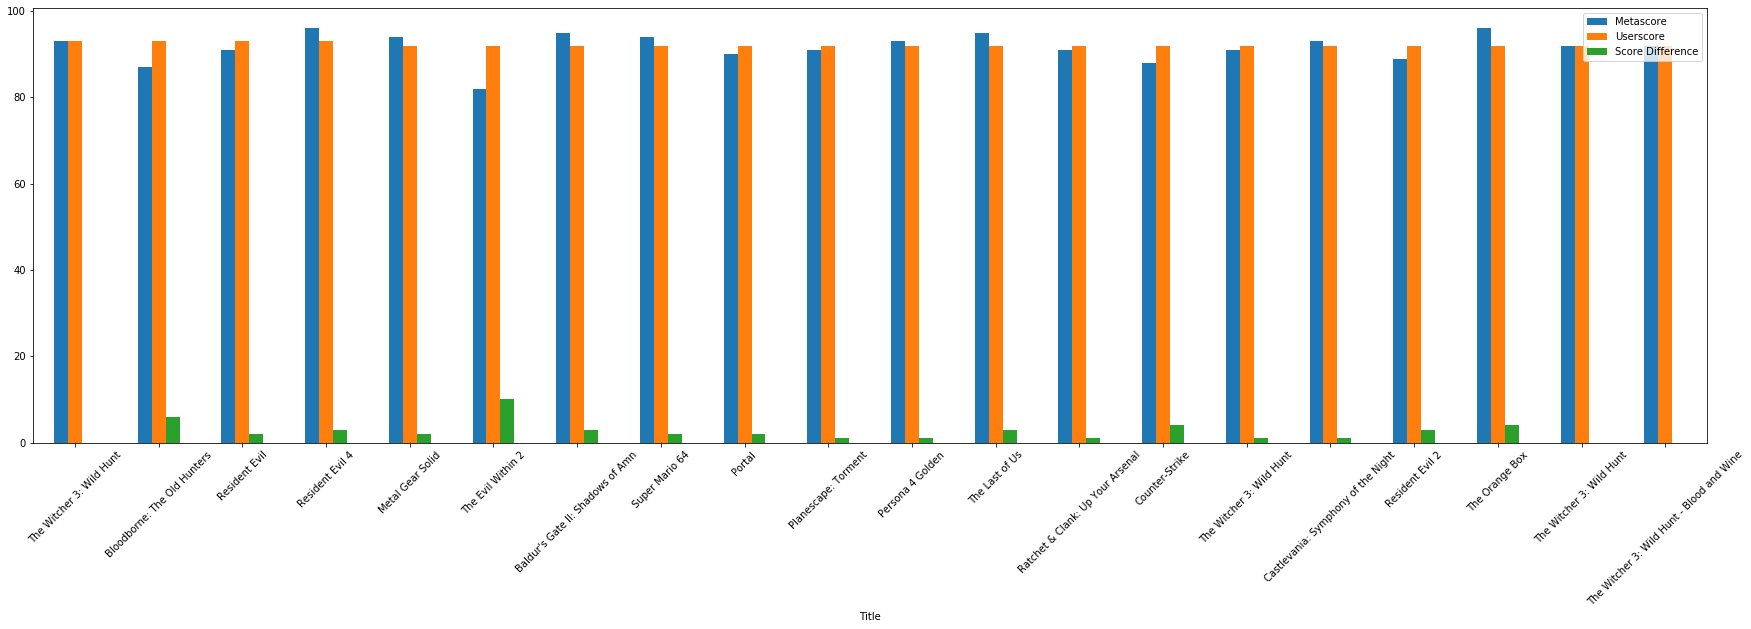

In [44]:
# Plot a bar graph of the above data using Pandas
score_graph = scores.plot(kind='bar',figsize=(30,8))
plt.xticks(rotation=45)
score_graph
# plt.savefig('MetaScoreDiff.png')